In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

**Per instrument delta split**

Net gain vs Net loss plot

Percentage doesnt really mean anything here, 
Its really measuring how many day to day changes are positive and how many are negative
but scaled by ther pecentage differnce so really large growth or really large drops would be overshadowed by instruments
that grow frequently but very little.

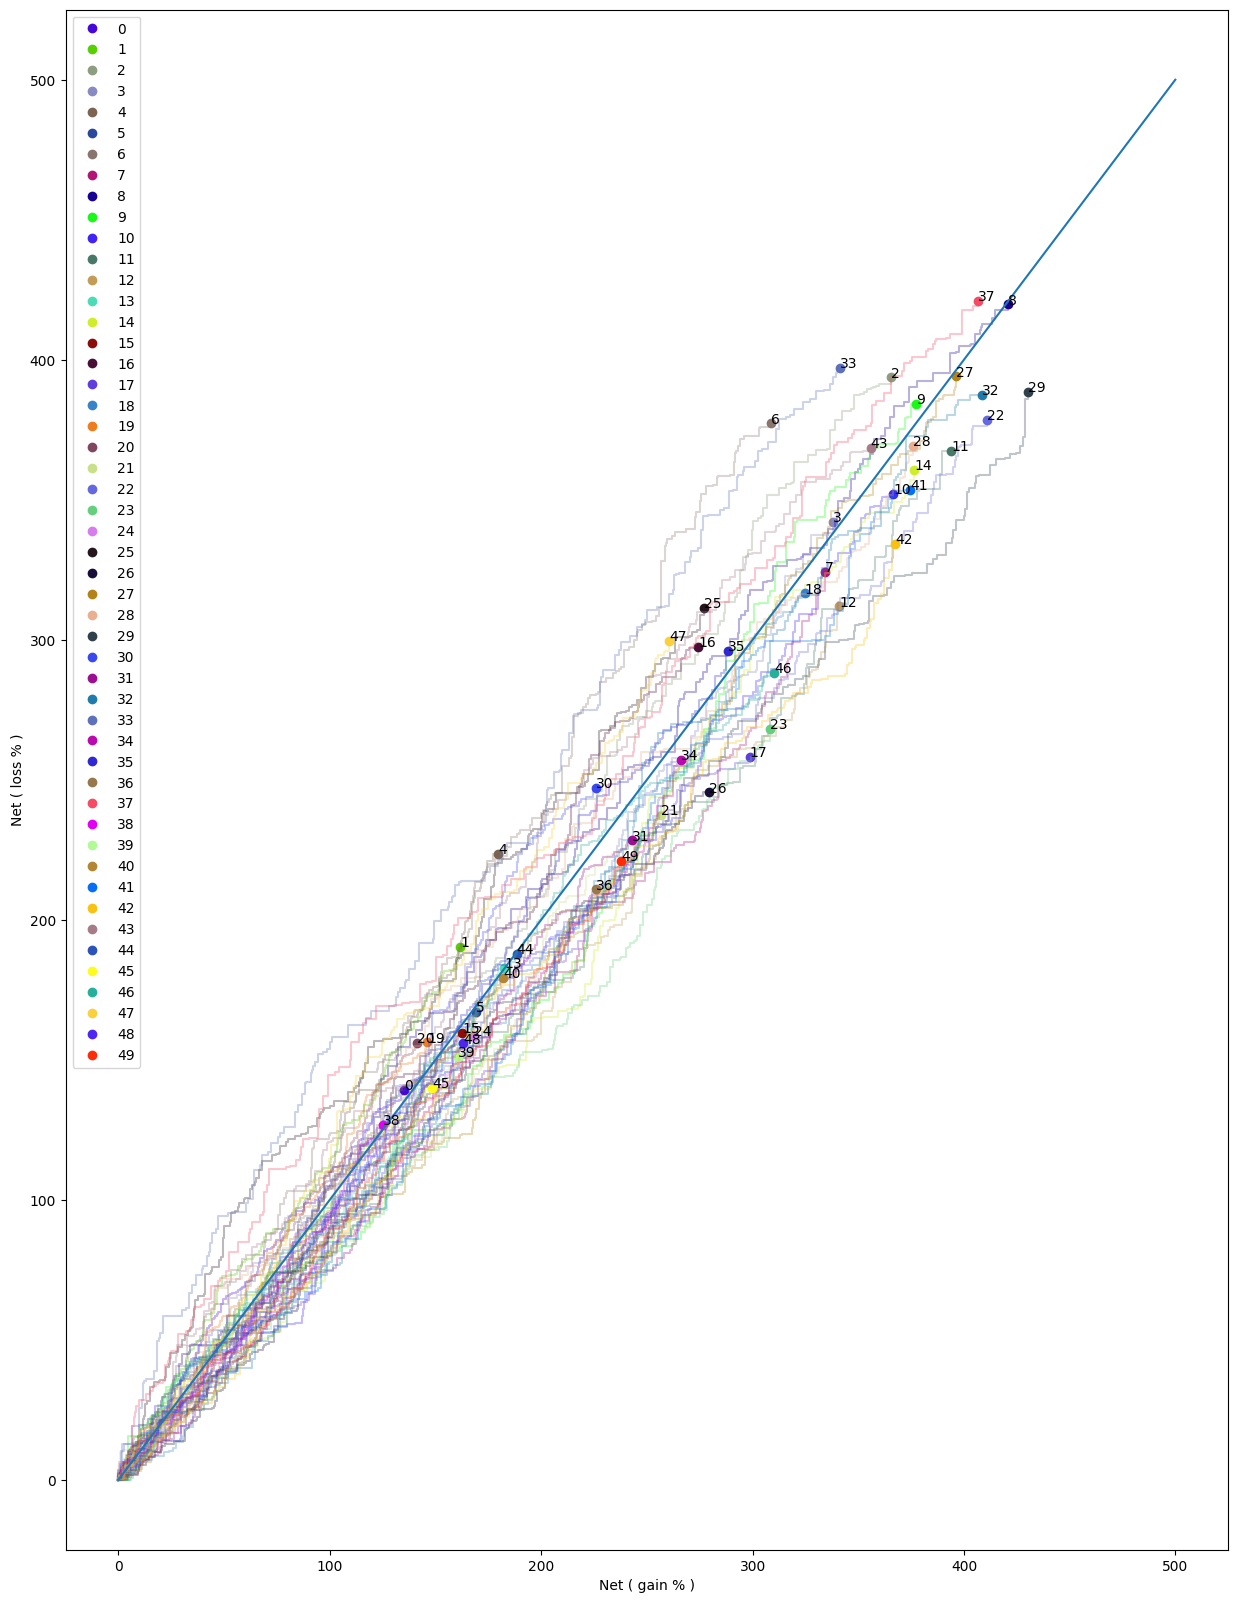

In [197]:
# Precompute the entire trajectory for each instrument
netPos = np.zeros((nInst, T))
netNeg = np.zeros((nInst, T))

for t in range(2,T):
    pdiff = np.zeros((nInst,t))
    for i in range(nInst):
        current = prices[i,:t]
        previous = np.zeros((t,))
        previous[0] = 1e-8
        previous[1:] = current[:-1]
        delta = current-previous
        percent_delta = 100* delta / previous
        percent_delta[0] = 0
        pdiff[i,:] = percent_delta
    posDelta = np.where(pdiff > 0,pdiff,0)
    negDelta = np.where(pdiff < 0,-pdiff,0)

    netPos[:,t] = posDelta.sum(axis=1)
    netNeg[:,t] = negDelta.sum(axis=1)

colors = np.random.rand(nInst, 3)
def plotSplit():
    f,ax = plt.subplots(figsize=(15,20))
    ax.set_xlabel("Net ( gain % )")
    ax.set_ylabel("Net ( loss % )")
    # for i,p in enumerate(zip(netPos,netNeg)):
    #     ax.plot(p[0],p[1],"o",label=str(i))
    #     ax.text(p[0],p[1],str(i))
    for i in range(nInst):
        ax.plot(netPos[i], netNeg[i],alpha=0.3,color=colors[i])
        lastPos = netPos[i][-1]
        lastNeg = netNeg[i][-1]
        ax.plot(lastPos,lastNeg,"o",label=str(i),color=colors[i])
        ax.text(lastPos,lastNeg,str(i))
    ax.plot([0,500],[0,500])
    plt.legend()
    plt.show()
plotSplit()